# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [ ]:
! git clone https://www.github.com/DS3001/the_bootstrap


Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 29 (delta 2), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 6.66 MiB/s, done.
Resolving deltas: 100% (3/3), done.


**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

1.

Probability of getting a 1, 2, 3, 4, 5, or 6 AS Rmin:
1: (1,1), (1,2), etc. + (2,1), (2,2), etc. : 11/36
2: (2,2), (2,3) etc. + (3,2), (4,2) etc. : 9/36
3: (3,3), (3,4), etc. + (4,3), (5,3), etc. : 7/36
4: 5/36
5: 3/36
6: 1/36
1 is more likely, 6 is less likely.
Expected value of Rmin:11/36 (1) +  2(9/36) + 3(7/36) etc. = 91/36 = 2.53


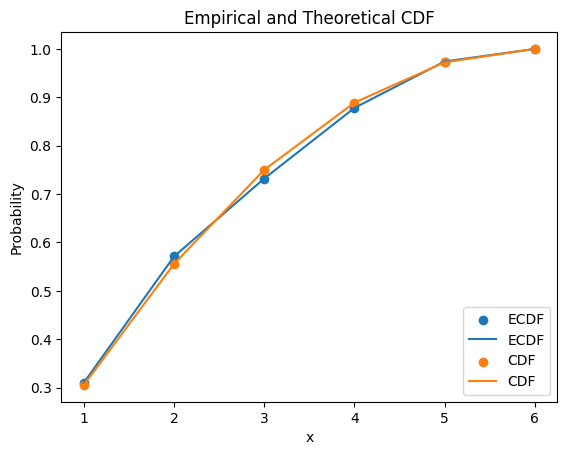

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dice = np.array([1,2,3,4,5,6])

#Calculation:
pdf = np.zeros(6)
for i in range(6):
    for j in range(6):
        min_ij = np.min([dice[i],dice[j]])
        pdf[min_ij-1] += 1
pdf = pdf/36
cdf = np.cumsum(pdf)

# Bootstrap:
N = 1000
d1 = np.random.choice(dice, size=N)
d2 = np.random.choice(dice, size=N)
min_roll = [ min([d1[i], d2[i]]) for i in range(N) ]

ecdf = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( min_roll <= dice[i] )

#Plots:
plt.scatter(dice,ecdf,label='ECDF')
plt.plot(dice,ecdf,label='ECDF')
plt.scatter(dice,cdf,label='CDF')
plt.plot(dice,cdf,label='CDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()

2.

Probability of getting a 1, 2, 3, 4, 5, or 6 as Rmed:
1: (1,1,1): 1/216
2: (1,2,3), (1,2,2), (1,3,2), etc: 40/216
3: 52/216
4: 52/216
5: 40/216
6: 1/216
3 and 4 are more likely values, 6 and 1 are less likely values.
Expected value of Rmed: 1(1/216) + 2(40/216), etc. : 217/72: 3.01


Expected value:  3.516


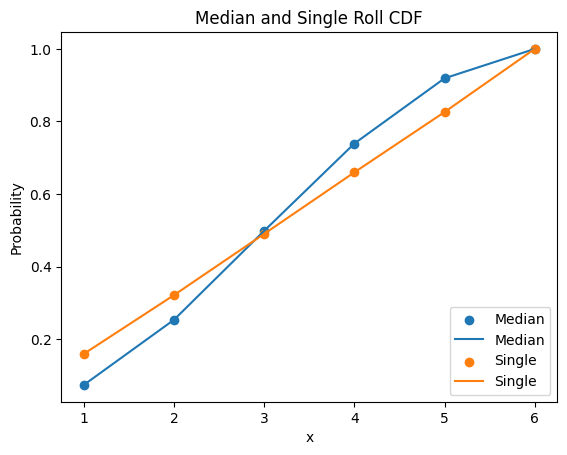

In [4]:
faces = np.array([1,2,3,4,5,6])
N = 5000
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
d3 = np.random.choice(faces, size=N)
med_roll = [ int(np.median([d1[i], d2[i], d3[i]])) for i in range(N) ]

expected_value = np.sum(med_roll)/N
print('Expected value: ', expected_value)

ecdf = np.zeros(6)
single = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( med_roll <= faces[i] )
    single[i] = (1/N)*np.sum( d1 <= faces[i] )

expected_value = np.sum(med_roll)/N

plt.scatter(faces,ecdf,label='Median')
plt.plot(faces,ecdf,label='Median')
plt.scatter(faces,single,label='Single')
plt.plot(faces,single,label='Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDF')
plt.show()


3.

                  0
count  50000.000000
mean       4.189040
std        3.254848
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       35.000000
Probabilities of Each Total:
0 
1     0.16802
2     0.16402
3     0.16896
4     0.16686
5     0.16762
7     0.02810
8     0.02720
9     0.02742
10    0.02658
11    0.02708
13    0.00422
14    0.00470
15    0.00488
16    0.00504
17    0.00470
19    0.00086
20    0.00072
21    0.00084
22    0.00070
23    0.00090
25    0.00008
26    0.00004
27    0.00002
28    0.00014
29    0.00012
31    0.00004
32    0.00004
33    0.00004
35    0.00006
Name: proportion, dtype: float64


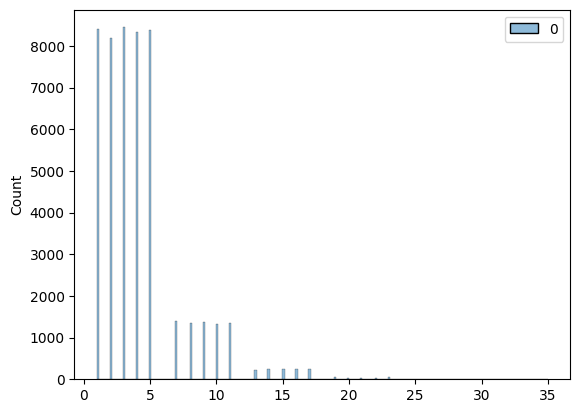

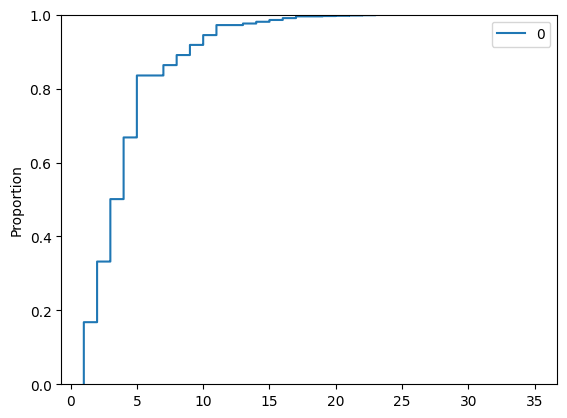

In [9]:
faces = np.array([1,2,3,4,5,6])
N = 50000
results = []
for i in range(N):
    go = True
    sum = 0
    while go is True:
        roll = np.random.choice(faces, size=1)
        sum += roll
        if roll < 6:
            go = False
            results.append(int(sum[0]))

results = pd.DataFrame(results)

print(results.describe()) #mean= expected value

#probabilities
probabilities = results.value_counts(normalize=True).sort_index()
print("Probabilities of Each Total:")
print(probabilities)


sns.histplot(results)
plt.show()

sns.ecdfplot(results)
plt.show()


**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

1.

In [16]:
df = pd.read_csv('./the_bootstrap/data/mammogram.csv')

print( pd.crosstab( df['treatment'], df['breast_cancer_death']) , '\n')
normalized_table= pd.crosstab( df['treatment'], df['breast_cancer_death'], margins=True, normalize=True)
print(normalized_table)


control_survival_rate = normalized_table.loc['control', 'no'] / normalized_table.loc['control', 'All']
mammogram_survival_rate = normalized_table.loc['mammogram', 'no'] / normalized_table.loc['mammogram', 'All']

# Print survival rates
print(f"Survival rate (Control): {control_survival_rate * 100}")
print(f"Survival rate (Mammogram): {mammogram_survival_rate * 100}")
print(f"Difference in survival rates: {mammogram_survival_rate *100 - control_survival_rate*100}")

raw_treatment_effect = 44425/44925 - 44405/44910
print('Raw treatment effect: ', raw_treatment_effect)




breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000
Survival rate (Control): 98.87552883544866
Survival rate (Mammogram): 98.88703394546467
Difference in survival rates: 0.011505110016003073
Raw treatment effect:  0.00011505110015985753


2.

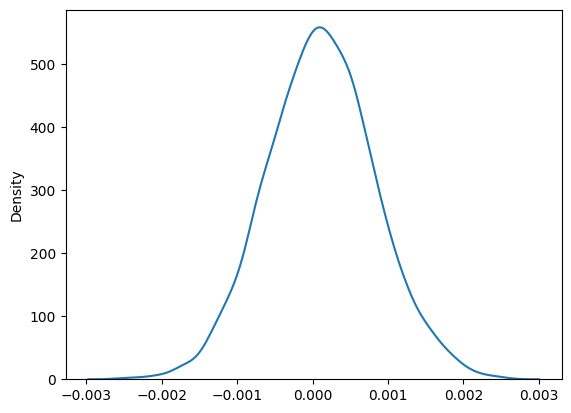

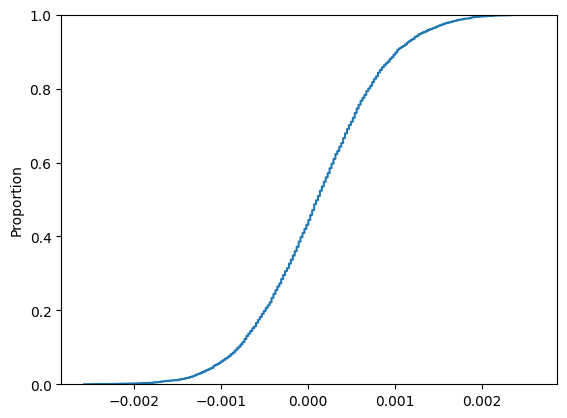

In [17]:
df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

S = 5000
fx = []
for t in range(S):
    df_treat_t = df_treat.sample( df_treat.shape[0], axis=0, replace=True)
    df_control_t = df_control.sample( df_control.shape[0], axis=0, replace=True)
    #
    treatment_effect_t = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect_t)

sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

3.

In [18]:
level = .99
lower_bound = np.quantile(fx, .005 )
upper_bound = np.quantile(fx, .995)

print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')' )


99% confidence interval: ( -0.0017550523045719662 ,  0.0020073840874106435 )


4. 0 falls within the confidence interval, which means you cannot confidently say you have enough evidence to reject the null hypothesis (that there is no difference in survival rates between the groups). It is possible the true difference between the treatment groups is 0. Even the upper bound of the confidence interval is low, indicating a very small potential treatment effect. The data set provides very sparse information about patient demographics, comorbidities, or other factors within the study (like earlier diagnosis) that may affect survival rate. If certain factors like better access to healthcare favor one group, this could mask the true benefit in mammograms; additionally, aggregating the data across different subgroups may also mask the treatment effects in high-risk populations. Additional data about patient demographics, health history/comorbidities, stage of breast cancer/cancer characteristics, and patient behavior would be necessary to gain a more holistic picture.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?